## Decision_Tree_Regression with Hyper parameter tuning

In [120]:
import pandas as pd
import numpy as np

In [2]:
# Reading combine data csv
combine_data= pd.read_csv(r'C:\Users\Unify\Desktop\janibasha\Complete Data Science life cycle\Data_collection\Html_scraping_data\Real_combine.csv')
combine_data

Unnamed: 0     T    TM    Tm     SLP     H   VV    V    VM      PM 2.5
0             1  26.7  33.0  20.0  1012.4  60.0  5.1  4.4  13.0  284.795833
1             3  29.1  35.0  20.5  1011.9  49.0  5.8  5.2  14.8  219.720833
2             5  28.4  36.0  21.0  1011.3  46.0  5.3  5.7  11.1  182.187500
3             7  25.9  32.0  20.0  1011.8  56.0  6.1  6.9  11.1  154.037500
4             9  24.8  31.1  20.6  1013.6  58.0  4.8  8.3  11.1  223.208333
..          ...   ...   ...   ...     ...   ...  ...  ...   ...         ...
638        1277  28.5  33.4  20.9  1012.6  59.0  5.3  6.3  14.8  185.500000
639        1279  24.9  33.2  14.8  1011.5  48.0  4.2  4.6  13.0  166.875000
640        1281  26.4  32.0  20.9  1011.2  70.0  3.9  6.7   9.4  200.333333
641        1283  20.8  25.0  14.5  1016.8  78.0  4.7  5.9  11.1  349.291667
642        1285  23.3  28.0  14.9  1014.0  71.0  4.5  3.0   9.4  310.250000

[643 rows x 10 columns]

In [3]:
# droping unwanted column from dataframe

combine_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
combine_data

T    TM    Tm     SLP     H   VV    V    VM      PM 2.5
0    26.7  33.0  20.0  1012.4  60.0  5.1  4.4  13.0  284.795833
1    29.1  35.0  20.5  1011.9  49.0  5.8  5.2  14.8  219.720833
2    28.4  36.0  21.0  1011.3  46.0  5.3  5.7  11.1  182.187500
3    25.9  32.0  20.0  1011.8  56.0  6.1  6.9  11.1  154.037500
4    24.8  31.1  20.6  1013.6  58.0  4.8  8.3  11.1  223.208333
..    ...   ...   ...     ...   ...  ...  ...   ...         ...
638  28.5  33.4  20.9  1012.6  59.0  5.3  6.3  14.8  185.500000
639  24.9  33.2  14.8  1011.5  48.0  4.2  4.6  13.0  166.875000
640  26.4  32.0  20.9  1011.2  70.0  3.9  6.7   9.4  200.333333
641  20.8  25.0  14.5  1016.8  78.0  4.7  5.9  11.1  349.291667
642  23.3  28.0  14.9  1014.0  71.0  4.5  3.0   9.4  310.250000

[643 rows x 9 columns]

In [5]:
# combine data top 5 rows
combine_data.head()

T    TM    Tm     SLP     H   VV    V    VM      PM 2.5
0  26.7  33.0  20.0  1012.4  60.0  5.1  4.4  13.0  284.795833
1  29.1  35.0  20.5  1011.9  49.0  5.8  5.2  14.8  219.720833
2  28.4  36.0  21.0  1011.3  46.0  5.3  5.7  11.1  182.187500
3  25.9  32.0  20.0  1011.8  56.0  6.1  6.9  11.1  154.037500
4  24.8  31.1  20.6  1013.6  58.0  4.8  8.3  11.1  223.208333

In [6]:
# combine data bottom 5 features
combine_data.tail()

T    TM    Tm     SLP     H   VV    V    VM      PM 2.5
638  28.5  33.4  20.9  1012.6  59.0  5.3  6.3  14.8  185.500000
639  24.9  33.2  14.8  1011.5  48.0  4.2  4.6  13.0  166.875000
640  26.4  32.0  20.9  1011.2  70.0  3.9  6.7   9.4  200.333333
641  20.8  25.0  14.5  1016.8  78.0  4.7  5.9  11.1  349.291667
642  23.3  28.0  14.9  1014.0  71.0  4.5  3.0   9.4  310.250000

In [7]:
# To get statistical data 
combine_data.describe()

T          TM          Tm          SLP           H  \
count  643.000000  643.000000  643.000000   643.000000  643.000000   
mean    27.609953   33.974028   20.669207  1009.030327   51.716952   
std      3.816030    4.189773    4.314514     4.705001   16.665038   
min     18.900000   22.000000    9.000000   998.000000   15.000000   
25%     24.900000   31.000000   17.950000  1005.100000   38.000000   
50%     27.000000   33.000000   21.400000  1009.400000   51.000000   
75%     29.800000   37.000000   23.700000  1013.100000   64.000000   
max     37.700000   45.000000   31.200000  1019.200000   95.000000   

               VV           V          VM      PM 2.5  
count  643.000000  643.000000  643.000000  643.000000  
mean     5.057698    7.686936   16.139036  111.378895  
std      0.727143    3.973736    6.915630   82.144946  
min      2.300000    1.100000    5.400000    0.000000  
25%      4.700000    5.000000   11.100000   46.916667  
50%      5.000000    6.900000   14.800000   89.875000  
75%      5.500000    9.400000   18.300000  159.854167  
max      7.700000   25.600000   77.800000  404.500000

In [8]:
# Now we need check null values 

combine_data.isnull()

T     TM     Tm    SLP      H     VV      V     VM  PM 2.5
0    False  False  False  False  False  False  False  False   False
1    False  False  False  False  False  False  False  False   False
2    False  False  False  False  False  False  False  False   False
3    False  False  False  False  False  False  False  False   False
4    False  False  False  False  False  False  False  False   False
..     ...    ...    ...    ...    ...    ...    ...    ...     ...
638  False  False  False  False  False  False  False  False   False
639  False  False  False  False  False  False  False  False   False
640  False  False  False  False  False  False  False  False   False
641  False  False  False  False  False  False  False  False   False
642  False  False  False  False  False  False  False  False   False

[643 rows x 9 columns]

In [9]:
combine_data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

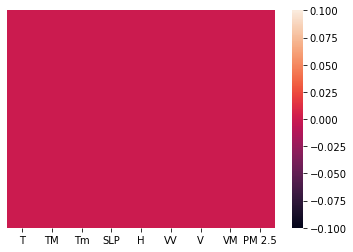

In [10]:
# we can also visualize null values with seaborn
import seaborn as sns
sns.heatmap(combine_data.isnull(),yticklabels=False)

If we observe the heat map there is no null values

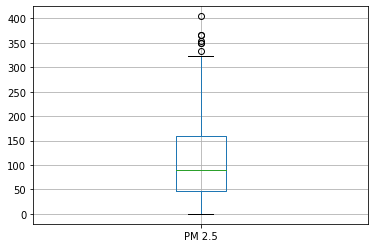

In [11]:
# To check outliers 
import matplotlib.pyplot as plt

combine_data.boxplot(column='PM 2.5')
plt.show()

Few outliers present in the PM 2.5 feature(dependent feature)

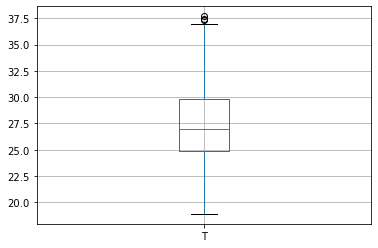

In [12]:
combine_data.boxplot(column='T')
plt.show()

In [13]:
combine_data.boxplot(column='Tm')
plt.show()

If we observe the above box-plots very very less outliers in independent features

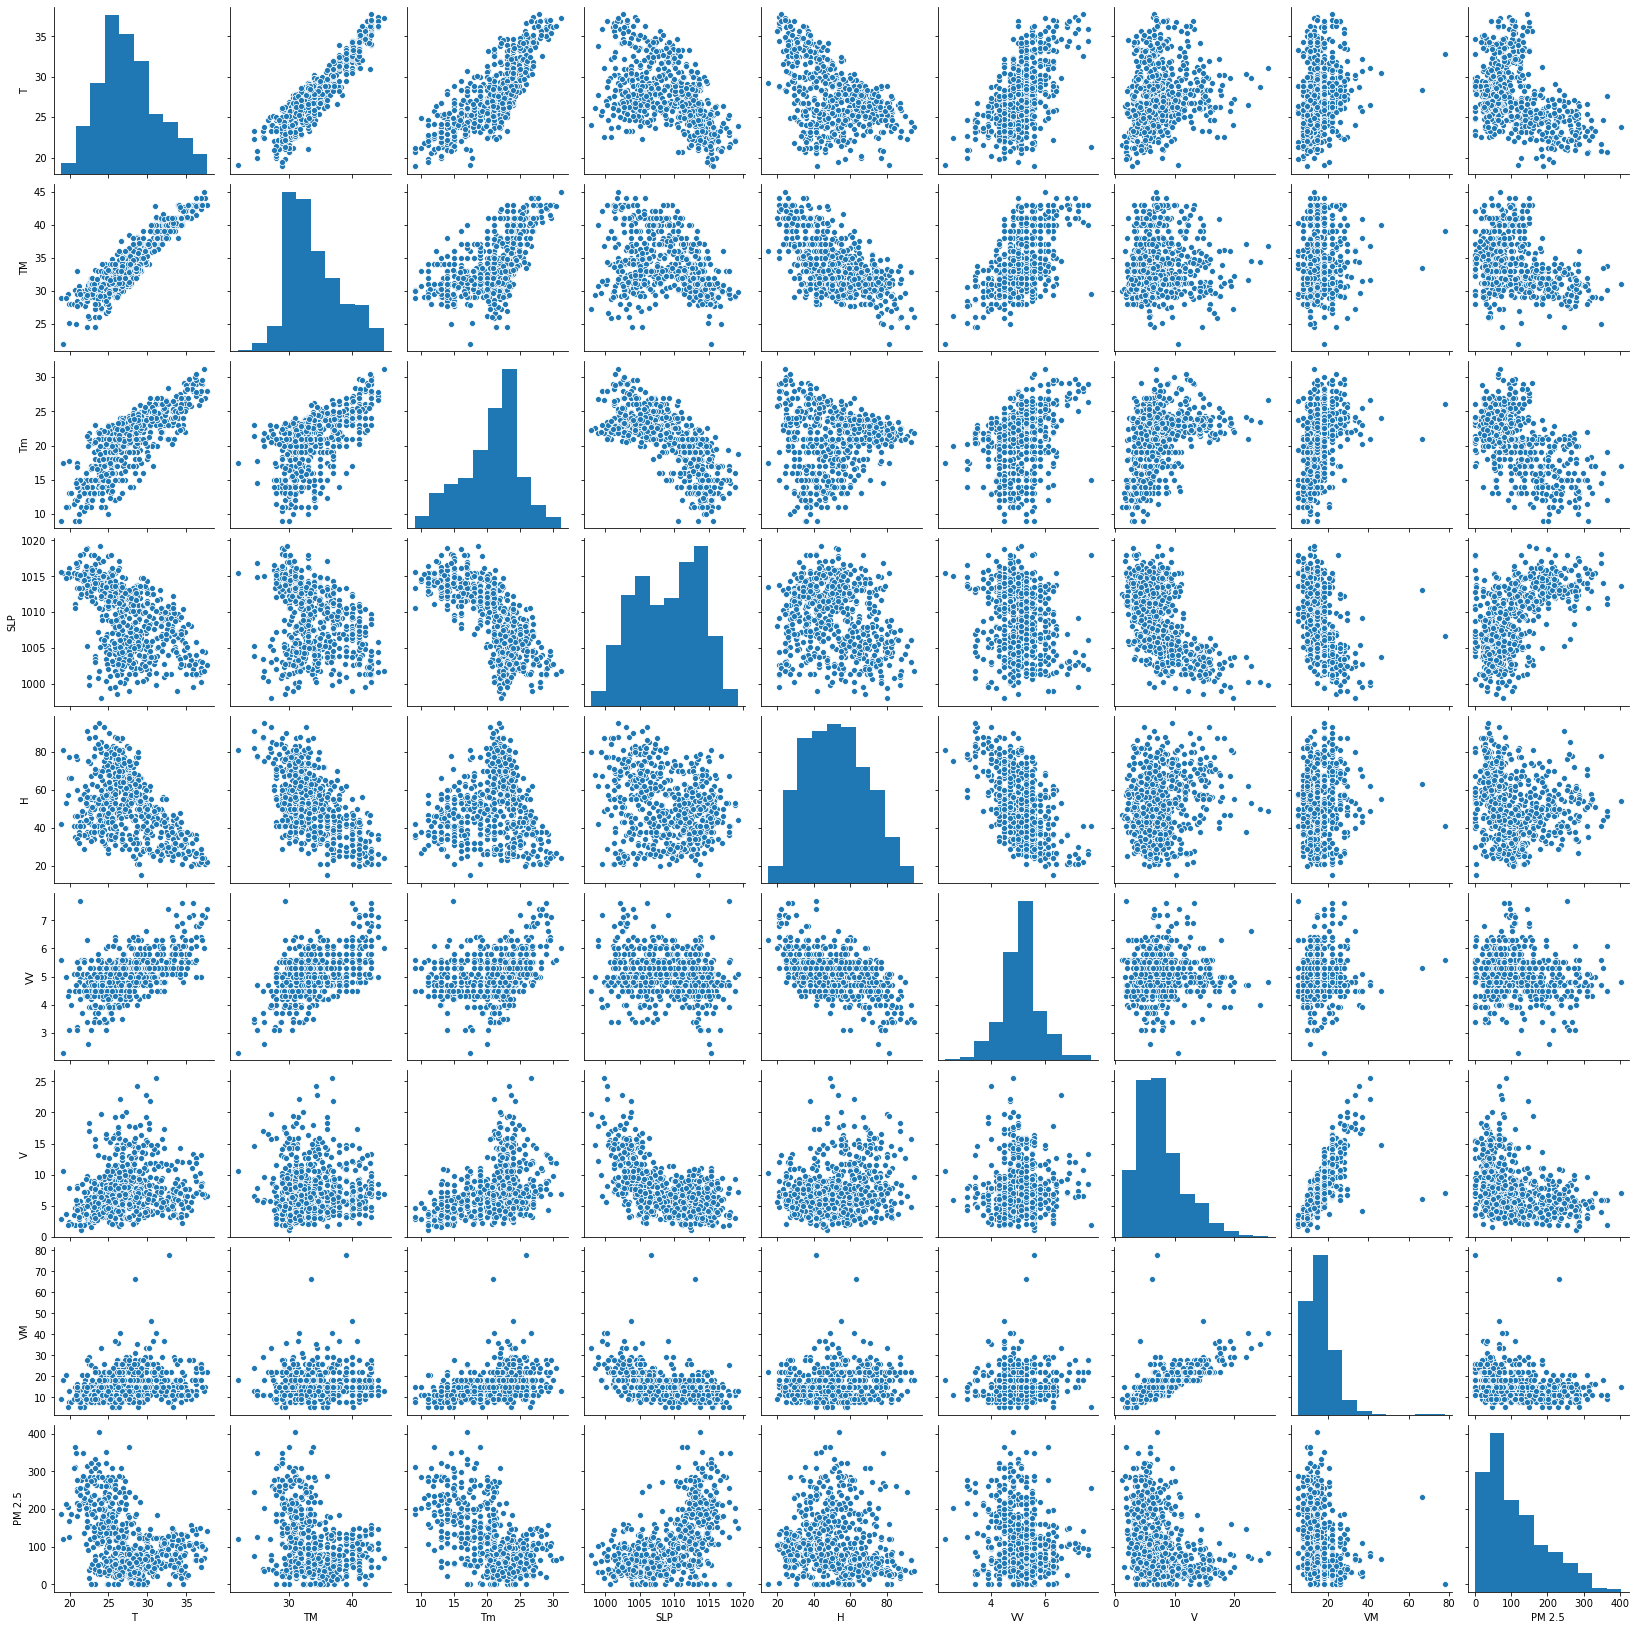

In [14]:
# Multivariate anlaysis 

sns.pairplot(combine_data)


If we observe the pair plot

We compare independent features with dependent feature(PM 2.5)

While comparing the PM 2.5 VS [T,TM,Tm,SLP,H,VV,V,VM] there is no one plot data in organized manner, all in unorder and no linear relation ship between dependent and independent features

So linear algorithms dosen't give good results on this data

In [15]:
# We also check the corelation between dependent and independent feature

combine_data.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.920752  0.786809 -0.516597 -0.477952  0.572818  0.160582   
TM      0.920752  1.000000  0.598095 -0.342692 -0.626362  0.560743 -0.002735   
Tm      0.786809  0.598095  1.000000 -0.735621  0.058105  0.296954  0.439133   
SLP    -0.516597 -0.342692 -0.735621  1.000000 -0.250364 -0.187913 -0.610149   
H      -0.477952 -0.626362  0.058105 -0.250364  1.000000 -0.565165  0.236208   
VV      0.572818  0.560743  0.296954 -0.187913 -0.565165  1.000000  0.034476   
V       0.160582 -0.002735  0.439133 -0.610149  0.236208  0.034476  1.000000   
VM      0.192456  0.074952  0.377274 -0.506489  0.145866  0.081239  0.747435   
PM 2.5 -0.441826 -0.316378 -0.591487  0.585046 -0.153904 -0.147582 -0.378281   

              VM    PM 2.5  
T       0.192456 -0.441826  
TM      0.074952 -0.316378  
Tm      0.377274 -0.591487  
SLP    -0.506489  0.585046  
H       0.145866 -0.153904  
VV      0.081239 -0.147582  
V       0.747435 -0.378281  
VM      1.000000 -0.319558  
PM 2.5 -0.319558  1.000000

If we observe the correlation between PM 2.5 feature and other features all of them negative except SLP

Corelation tells about if PM 2.5 increases what is the behaviour of other features

All of them negative realation so if PM 2.5 increases other features decreases

Corr=negative ======>> X increases then Y decreases

In [16]:
# visualising correlation in heatmap

relation =combine_data.corr()
relation_index=relation.index


In [17]:
relation_index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

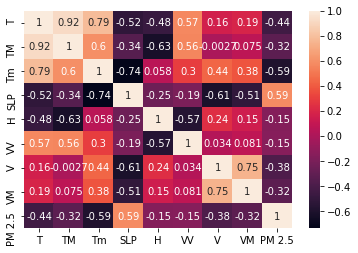

In [18]:
sns.heatmap(combine_data[relation_index].corr(),annot=True)

Upto know actually we are doing feature engineering

We check for null values We check for categorical features We check for outliers We check corelation between dependend and independent features

In [19]:
# Feature selection

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [20]:
# Splitting the data into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(
    combine_data.iloc[:,:-1],
    combine_data.iloc[:,-1],
    test_size=0.3,
    random_state=0)

In [21]:
# size of train data set
X_train.shape

(450, 8)

In [22]:
# size of test data set
X_test.shape

(193, 8)

In [23]:
# feature forward selection method

clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)

# Building step forward feature selection
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=True,
           verbose=0,
           scoring='neg_mean_squared_error',
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

In [24]:
# Selected feature's by forward feature selection method
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 2, 3, 4, 6]


SequentialFeatureSelector select the feature [T,Tm,SLP,H,V]

In [25]:
# Feature selection by Extraregressor(model based)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    combine_data.iloc[:,:-1],
    combine_data.iloc[:,-1],
    test_size=0.3,
    random_state=0)

In [27]:
reg= ExtraTreesRegressor()

In [28]:
reg.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [29]:
reg.feature_importances_

array([0.17566194, 0.08745285, 0.21144862, 0.23180122, 0.08378612,
       0.05582731, 0.07885443, 0.07516751])

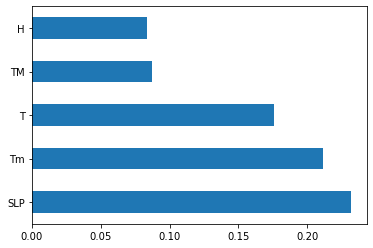

In [30]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Now we check the both feature selection features to predict 

Which gives good results we consider those features


Before Train the data we need to do feature normalization because it makes training less sensitive to the scale of features

## Model Training


In [31]:
# Traning model with all features 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combine_data.iloc[:,:-1], combine_data.iloc[:,-1], test_size=0.3, random_state=0)

In [32]:
X_train


T    TM    Tm     SLP     H   VV     V    VM
334  28.9  36.0  15.0  1009.2  21.0  5.3   4.8  11.1
46   32.8  39.0  26.0  1006.6  41.0  5.6   7.0  77.8
246  30.3  37.0  24.2  1003.7  38.0  4.7  21.9  29.4
395  28.4  36.6  23.0  1003.1  63.0  4.7  10.7  18.3
516  26.9  31.0  22.9  1003.0  76.0  4.0   7.8  16.5
..    ...   ...   ...     ...   ...  ...   ...   ...
9    23.7  30.4  17.0  1015.8  46.0  5.1   5.2  14.8
359  33.6  40.0  25.0  1006.9  36.0  5.8   6.1  11.1
192  24.9  30.4  19.0  1008.9  57.0  4.8   4.6   9.4
629  26.1  29.0  22.4  1001.2  87.0  5.0  14.1  22.2
559  23.8  30.2  17.9  1010.6  55.0  4.5   3.7   7.6

[450 rows x 8 columns]

In [33]:
X_test

T    TM    Tm     SLP     H   VV     V    VM
637  28.4  33.5  20.9  1013.1  63.0  5.3   6.1  66.5
165  20.7  30.1   9.0  1010.5  35.0  4.5   4.6  14.8
467  26.7  33.5  21.0  1010.9  37.0  5.1   5.7  11.1
311  26.0  31.0  20.4  1011.5  63.0  4.8   3.9   9.4
432  26.4  30.9  22.6  1010.0  75.0  4.2   7.6  16.5
..    ...   ...   ...     ...   ...  ...   ...   ...
249  27.2  32.3  22.0  1003.7  55.0  4.8  20.0  29.4
89   29.7  34.0  22.6  1003.8  56.0  5.5  13.5  27.8
293  22.3  30.3  11.4  1012.6  37.0  5.1   7.2  20.6
441  27.1  33.0  20.0  1010.7  49.0  4.2   6.1  18.3
478  25.6  32.0  19.0  1012.1  59.0  3.9   6.1  11.1

[193 rows x 8 columns]

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
# creating Decision tree regression model

reg_decision_model=DecisionTreeRegressor()

In [117]:
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [118]:
reg_decision_model.score(X_train,y_train)

1.0

In [119]:
reg_decision_model.score(X_test,y_test)

0.14861342139714717

Train data set get 100% score 

Test data set get 14% score because we did not mention parameters while intializing the tree because it split train untli end node 

Due to this at leaf node we have less points and depth of tree increase and because of this our model overfit that's why we are getting high score for training and less score for test

So to solve this problem we use Hyper parameter tuning 

I use GridSearch for tuning

In [51]:
# for overfit decision tree visualization

from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
from sklearn.tree import export_graphviz



C:\Users\Unify\anaconda3\envs\env2\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Above lib use for visualizing the Decision tree

In [55]:
# Independent features in list

independent_features=list(combine_data.columns[:-1])

independent_features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [57]:
# Setting path for graphviz

import os

os.environ['PATH'] = os.environ['PATH'] + ';' + os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [63]:
# exporting decision tree

data=StringIO()
export_graphviz(reg_decision_model,out_file=data,feature_names=independent_features,filled=True,rounded=True)

tree=pydotplus.graphviz.graph_from_dot_data(data.getvalue())
Image(tree.create_png())

If we observe the above tree carefully at leaf node we have samples 1 that's why tree grow that much large ,because of less samples in leaf nodes it leads to model overfit

This is the reason of we getting high score for train and very low score for test

## Model Evaluation 

In [65]:
prediction=reg_decision_model.predict(X_test)

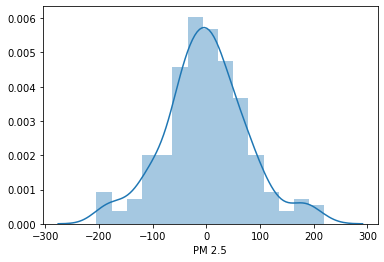

In [68]:
# checking difference between labled y and predicted y
sns.distplot(y_test-prediction)

We are getting nearly bell shape curve that means our model working good, but this is not the best model for the data

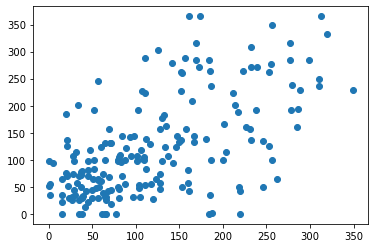

In [69]:
# checking predicted y and labeled y
plt.scatter(y_test,prediction)

## Hyper Parameter tuning

In [82]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

Above we intializing hyperparmeters random range using Gridsearch we find best parameters

In [83]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [84]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [85]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [86]:
X=combine_data.iloc[:,:-1]

In [87]:
y=combine_data.iloc[:,-1]

In [88]:
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,y)

timer(start_time)

Fitting 10 folds for each of 50400 candidates, totalling 504000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 3264 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 6080 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 9408 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 13248 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 17600 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 22464 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 27840 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 33728 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 40128 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 47040 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 54464 task

0.0 : 18.0 : 40.29


Hyper parameter tuning takes 18 min 40 sec

In [105]:
tuning_model.best_params_

{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 8,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [106]:
tuning_model.best_score_

-3621.0007087939457

In [107]:
# Model Evaluation

prediction=tuning_model.predict(X_test)

In [108]:
sns.distplot(y_test-prediction)

In [109]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 52.02187705123597
MSE: 4589.011220616968
RMSE: 67.74224103627638


## Conclusion 

If we compare the MSE of Lasso regression and Decision tree  Regression Lasso MSE is less but Decision tree is more genaralization model compare to the Lasso regression